In [392]:
import pandas
import seaborn
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier

In [393]:
dataset = pandas.read_csv("datasets/sensor_readings_24.csv")
dataset.sample(10)

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,...,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,funcao_robo
4144,1.919,NaN,5.000,5.000,1.646,1.604,1.586,1.567,1.572,1.593,...,1.280,1.221,0.735,0.716,0.705,0.713,5.000,5.000,1.907,Move-Forward
13,0.484,0.544,3.661,3.665,5.000,2.928,5.000,2.321,2.304,5.022,...,0.623,0.493,0.484,0.495,0.480,0.461,0.474,0.485,0.476,Sharp-Right-Turn
2116,1.938,5.000,2.452,5.000,5.000,3.277,3.261,2.909,2.895,2.913,...,0.495,0.879,0.739,0.916,0.763,0.783,0.798,1.763,1.423,Move-Forward
1555,0.514,1.414,1.386,1.375,1.387,1.413,1.436,2.616,3.242,3.252,...,0.826,0.836,1.007,5.000,0.476,0.455,0.449,0.458,1.471,Slight-Right-Turn
1333,1.756,5.000,5.000,3.273,4.234,5.000,5.000,5.000,3.083,5.000,...,0.479,0.435,0.425,0.431,0.462,0.465,1.037,1.037,1.060,Sharp-Right-Turn
2066,2.171,2.153,2.166,5.000,3.286,3.269,3.267,3.021,3.339,3.339,...,0.987,0.717,0.679,0.660,0.651,0.679,5.000,0.745,1.699,Sharp-Right-Turn
4612,1.302,1.295,1.387,4.779,4.167,5.000,5.000,2.462,2.440,1.715,...,0.851,0.871,0.576,0.542,0.532,0.551,0.661,4.763,5.000,Sharp-Right-Turn
1564,0.551,1.441,1.414,1.402,1.414,1.441,1.463,2.602,3.220,3.218,...,0.801,0.811,0.832,5.000,0.506,0.485,0.480,0.488,0.534,Sharp-Right-Turn
1556,0.519,1.411,1.386,1.375,1.387,1.445,1.439,2.615,3.242,3.251,...,0.826,0.837,1.008,5.000,0.565,0.458,0.451,0.459,0.505,Move-Forward
3696,1.336,1.359,4.131,5.000,5.000,2.341,2.359,1.628,5.000,4.930,...,0.629,0.606,0.601,0.624,0.767,5.000,5.000,5.000,1.326,Sharp-Right-Turn


In [394]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sensor_1     5442 non-null   float64
 1   sensor_2     5442 non-null   float64
 2   sensor_3     5442 non-null   float64
 3   sensor_4     5442 non-null   float64
 4   sensor_5     5442 non-null   float64
 5   sensor_6     5442 non-null   float64
 6   sensor_7     5442 non-null   float64
 7   sensor_8     5442 non-null   float64
 8   sensor_9     5442 non-null   float64
 9   sensor_10    5442 non-null   float64
 10  sensor_11    5442 non-null   float64
 11  sensor_12    5442 non-null   float64
 12  sensor_13    5442 non-null   float64
 13  sensor_14    5442 non-null   float64
 14  sensor_15    5442 non-null   float64
 15  sensor_16    5442 non-null   float64
 16  sensor_17    5442 non-null   float64
 17  sensor_18    5442 non-null   float64
 18  sensor_19    5442 non-null   float64
 19  sensor

In [395]:
dataset.dropna(subset=["funcao_robo"], inplace=True)

In [396]:
dataset["funcao_robo"].info()

<class 'pandas.core.series.Series'>
Int64Index: 5442 entries, 0 to 5455
Series name: funcao_robo
Non-Null Count  Dtype 
--------------  ----- 
5442 non-null   object
dtypes: object(1)
memory usage: 85.0+ KB


In [397]:
# Analisando alguns dos dados faltantes no dataset
dataset[dataset.isnull().any(axis=1)].sample(10)

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,...,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,funcao_robo
4960,1.775,5.000,5.000,4.250,4.250,2.934,5.000,2.055,1.802,2.600,...,0.537,NaN,0.486,0.495,0.516,0.538,1.068,1.069,1.739,Sharp-Right-Turn
5130,1.020,1.052,1.730,2.259,2.286,3.070,NaN,5.000,5.000,1.297,...,0.665,0.651,0.665,0.681,0.700,1.010,0.993,0.977,1.049,Move-Forward
5423,4.847,3.620,5.000,2.646,2.642,NaN,1.917,1.891,4.857,1.386,...,0.793,0.790,0.798,0.884,0.849,0.885,5.000,0.703,5.000,Sharp-Right-Turn
3351,0.775,2.043,2.758,2.895,5.000,5.000,5.000,1.574,1.559,1.531,...,0.761,NaN,0.793,1.143,0.746,0.728,0.720,0.728,0.756,Sharp-Right-Turn
1733,2.412,2.402,2.074,2.325,1.770,1.418,1.384,NaN,1.386,1.773,...,1.007,0.997,1.007,0.758,2.312,2.327,4.718,2.390,5.000,Move-Forward
4851,2.359,2.580,2.574,2.592,3.253,3.233,3.233,2.801,2.801,2.816,...,0.865,0.909,NaN,0.782,0.873,0.873,4.299,5.000,1.564,Sharp-Right-Turn
4581,NaN,1.317,4.126,5.000,2.848,2.834,2.408,1.681,5.000,5.000,...,0.758,0.587,0.572,0.591,0.709,5.000,1.180,1.300,1.287,Sharp-Right-Turn
3982,0.956,5.000,2.487,2.696,2.678,2.693,NaN,2.792,3.231,2.746,...,0.737,0.726,0.732,0.755,0.891,0.807,0.793,0.927,0.947,Sharp-Right-Turn
908,1.081,3.960,5.000,2.500,2.775,2.775,2.578,1.130,5.000,1.082,...,NaN,0.636,0.650,5.000,5.000,1.008,5.000,1.055,1.059,Move-Forward
4758,1.418,1.425,1.447,1.976,1.972,1.783,3.235,5.000,3.882,3.886,...,0.798,0.672,0.482,0.472,NaN,0.507,0.519,0.566,1.438,Slight-Right-Turn


In [398]:
# Identificando nosso labels
dataset["funcao_robo"].unique()

array(['Slight-Right-Turn', 'Sharp-Right-Turn', 'Move-Forward',
       'Slight-Left-Turn'], dtype=object)

In [399]:
# Percebemos alguns dados faltantes em algumas filas aleatorias e decidimos preencher com KNNImputer
labels = dataset["funcao_robo"]

na_imputer = KNNImputer(n_neighbors=3, weights="uniform")
filled_dataset = na_imputer.fit_transform(dataset.drop(["funcao_robo"], axis=1))

dataset = pandas.DataFrame(filled_dataset)
dataset["labels"] = labels
dataset.sample(10)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,labels
2426,1.387,1.618,1.438,2.567,3.200,3.194,5.000,5.000,5.000,5.000,...,0.617000,0.507,0.502,0.515,1.560,0.845,1.414,1.379,1.374,Sharp-Right-Turn
1539,0.571,1.359,1.367,1.407,2.607,1.441,2.593,3.223,3.243,5.000,...,0.857333,5.000,0.530,0.492,0.468,0.473,0.496,0.515,0.560,Sharp-Right-Turn
3049,2.155,2.145,2.161,5.000,5.000,3.224,3.223,2.975,2.995,3.304,...,1.052000,1.016,0.726,0.706,0.697,0.714,3.055,1.135,1.697,Sharp-Right-Turn
1555,0.521,1.404,1.387,1.375,1.391,1.435,1.438,2.614,3.247,3.250,...,0.826000,0.837,1.008,5.000,0.569,0.462,0.452,0.461,0.507,Slight-Right-Turn
5056,2.699,2.839,5.000,5.000,1.621,1.584,1.558,1.540,1.549,1.589,...,0.857000,1.190,0.747,0.727,0.720,0.727,0.757,5.000,1.440,Move-Forward
510,2.575,2.810,5.000,5.000,5.000,5.000,1.638,2.205,1.593,2.672,...,0.953000,0.994,0.663,0.647,0.638,0.645,5.000,5.000,1.862,Move-Forward
4712,1.369,1.395,1.422,5.000,3.253,3.217,5.000,3.888,5.000,5.000,...,0.520000,0.493,0.487,0.495,0.616,0.556,1.120,1.381,1.362,Move-Forward
837,2.636,2.638,2.170,2.149,1.848,1.388,1.307,1.297,1.313,1.576,...,0.920000,0.881,0.917,0.828,0.817,5.000,4.835,3.647,5.000,Sharp-Right-Turn
1430,0.870,2.732,2.902,5.000,5.000,1.561,5.000,1.454,1.443,1.451,...,0.806000,0.827,1.169,0.804,0.778,0.770,0.777,0.801,0.822,Sharp-Right-Turn
2278,1.132,2.016,5.000,3.296,4.254,5.000,5.000,1.950,1.745,2.555,...,0.710000,1.763,0.457,0.451,0.463,0.482,1.112,1.099,1.113,Slight-Right-Turn


In [400]:
# Agora não temos mais dados faltantes S2
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5442 entries, 0 to 5441
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       5442 non-null   float64
 1   1       5442 non-null   float64
 2   2       5442 non-null   float64
 3   3       5442 non-null   float64
 4   4       5442 non-null   float64
 5   5       5442 non-null   float64
 6   6       5442 non-null   float64
 7   7       5442 non-null   float64
 8   8       5442 non-null   float64
 9   9       5442 non-null   float64
 10  10      5442 non-null   float64
 11  11      5442 non-null   float64
 12  12      5442 non-null   float64
 13  13      5442 non-null   float64
 14  14      5442 non-null   float64
 15  15      5442 non-null   float64
 16  16      5442 non-null   float64
 17  17      5442 non-null   float64
 18  18      5442 non-null   float64
 19  19      5442 non-null   float64
 20  20      5442 non-null   float64
 21  21      5442 non-null   float64
 22  

In [401]:
# Como a Média está muito próxima do Desvio Padrão,
# consideramos não ter outliers, ou que estão impactando pouco
dataset.describe()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
count,5442.000000,5442.000000,5442.000000,5442.000000,5442.000000,5442.000000,5442.000000,5442.000000,5442.000000,5442.000000,...,5442.00000,5442.000000,5442.000000,5442.000000,5442.000000,5442.000000,5442.000000,5442.000000,5442.000000,5442.000000
mean,1.470583,2.324720,2.488896,2.795224,2.956295,2.892110,3.352508,2.540977,3.126274,2.832604,...,2.20707,1.200545,0.990157,0.910446,1.058238,1.075819,1.016872,1.778887,1.554509,1.577777
std,0.801817,1.407915,1.247414,1.309497,1.338568,1.281516,1.413151,1.111888,1.356732,1.307898,...,1.71582,1.096267,0.941726,0.890034,1.144665,1.139782,0.888491,1.572032,1.289668,1.149740
min,0.400000,0.437000,0.470000,0.833000,1.120000,1.114000,1.122000,0.859000,0.836000,0.810000,...,0.49500,0.424000,0.373000,0.354000,0.340000,0.355000,0.380000,0.370000,0.367000,0.377000
25%,0.921000,1.362000,1.539250,1.729000,1.773000,1.785250,1.931000,1.618000,1.800000,1.636000,...,0.86100,0.690000,0.581000,0.530000,0.524000,0.542000,0.567000,0.743000,0.791250,0.884000
50%,1.334000,1.903500,2.063000,2.455500,2.666000,2.681500,3.226000,2.173000,2.802000,2.679500,...,1.32850,0.803000,0.738000,0.684000,0.690500,0.693000,0.764000,1.030000,1.071500,1.289000
75%,1.811500,2.675000,2.739750,4.092750,4.314000,3.830500,5.000000,3.193000,5.000000,3.531500,...,4.43675,1.158000,0.913000,0.837000,0.857000,0.862750,1.003750,2.071750,1.562750,1.657000
max,5.000000,5.025000,5.029000,5.017000,5.000000,5.005000,5.008000,5.087000,5.000000,5.022000,...,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


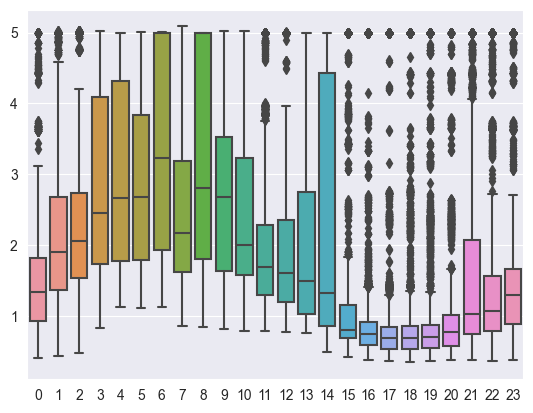

In [402]:
# Ainda analisando os outliers, vemos que uma parte dos sensores na
# maioria do tempo não está reconhechendo nenhum objeto (parede).

# Depois de entender a poisição dos sensores, percebemos que aqueles
# com mais "outliers" são os sensores da direita que tem pouca
# utilidade no ambiente no qual foi testado.

dataset_no_label = dataset.drop(columns=["labels"])
seaborn.boxplot(dataset_no_label);

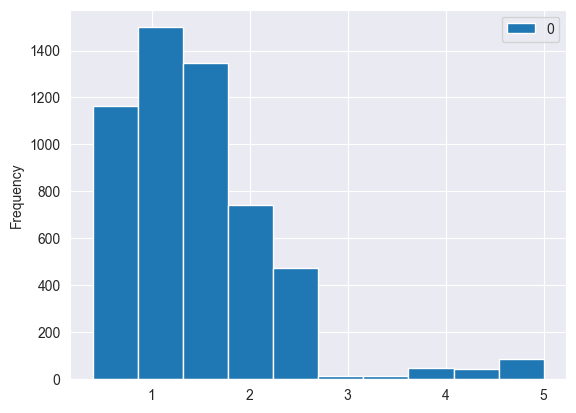

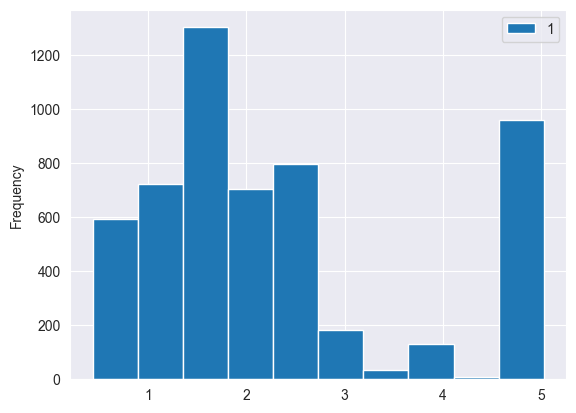

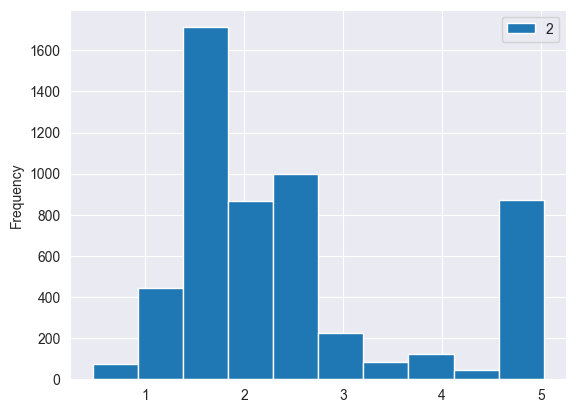

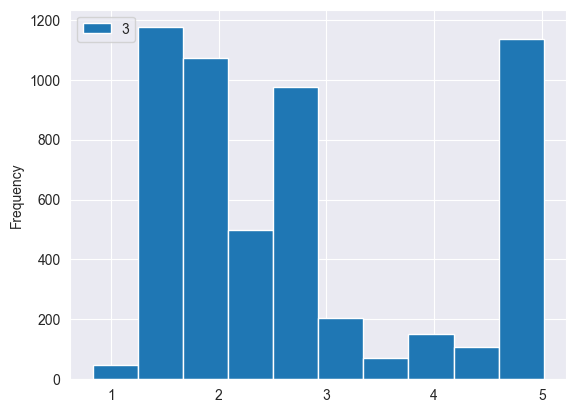

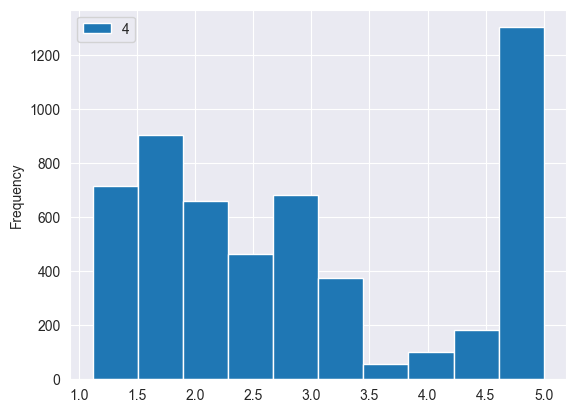

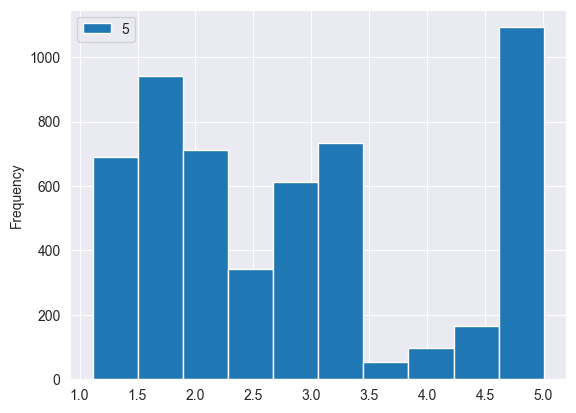

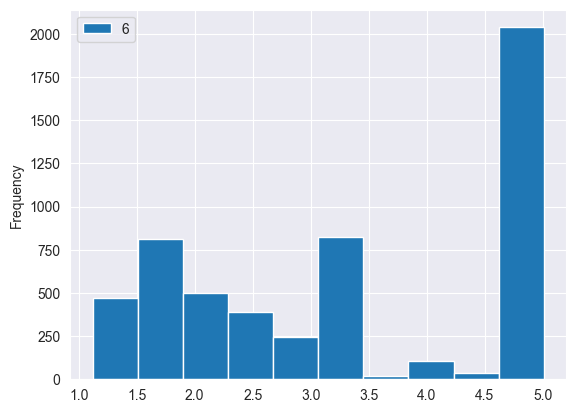

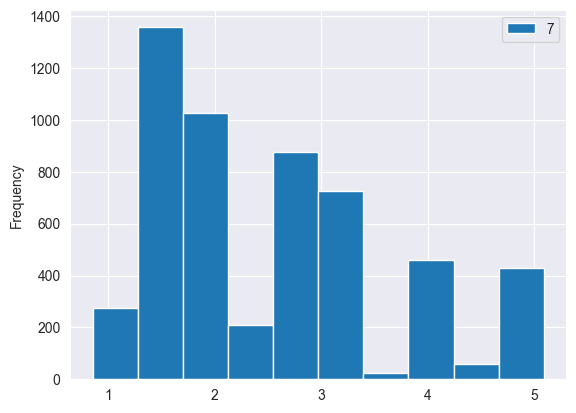

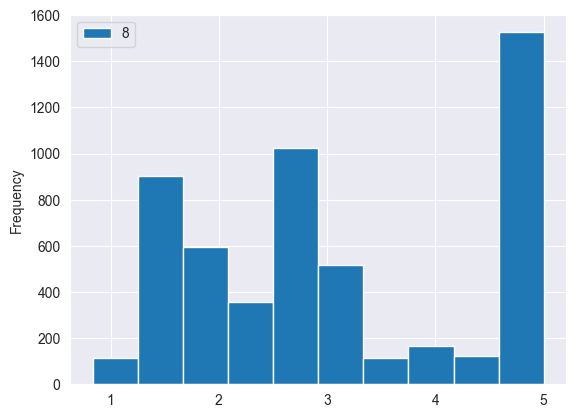

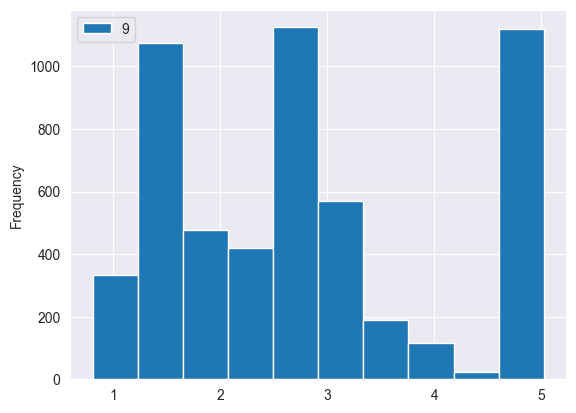

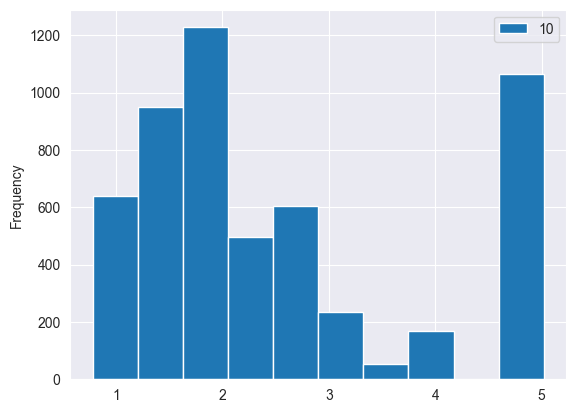

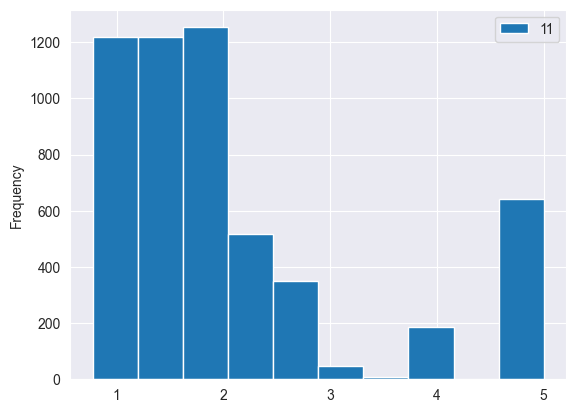

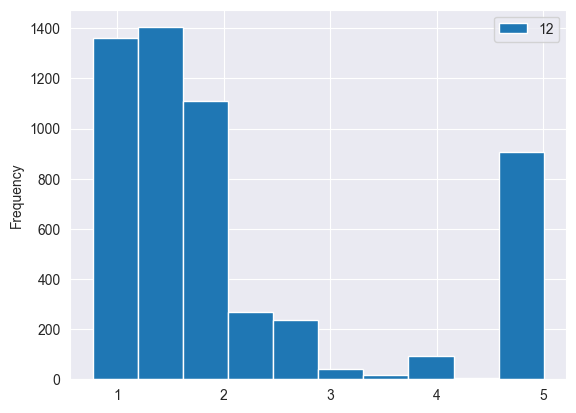

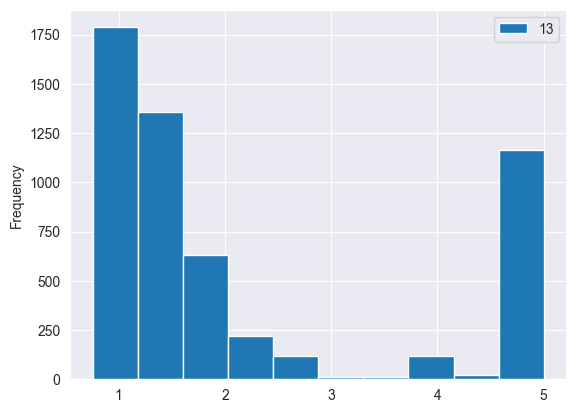

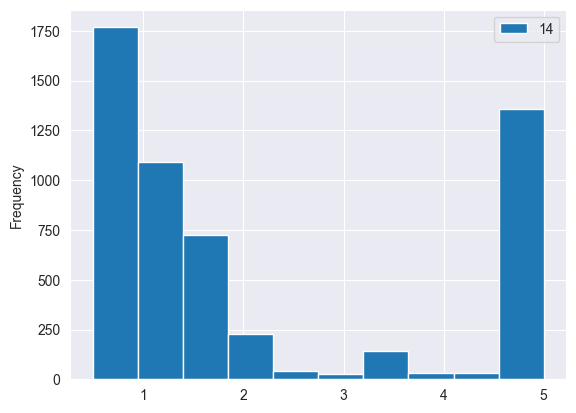

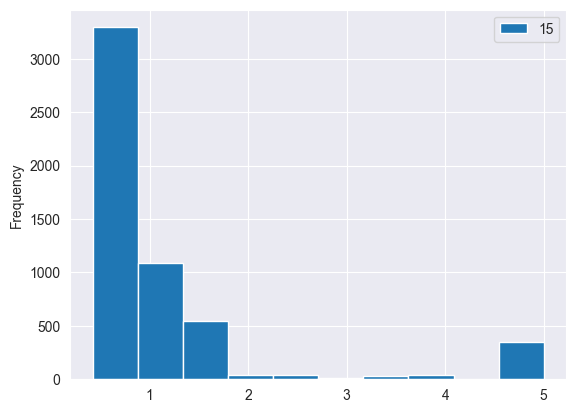

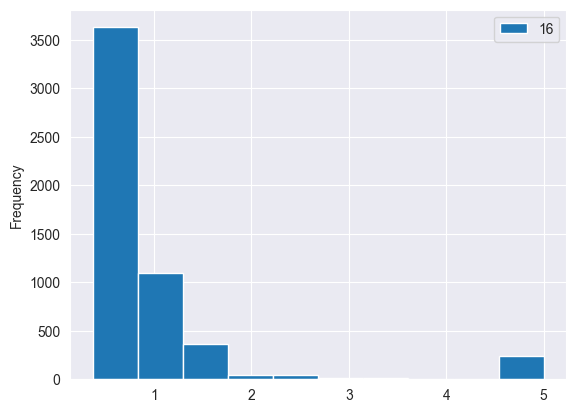

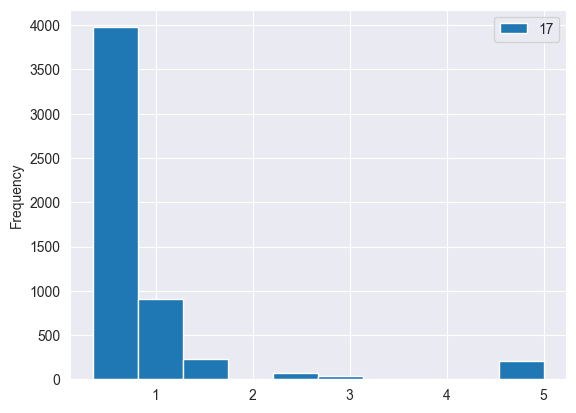

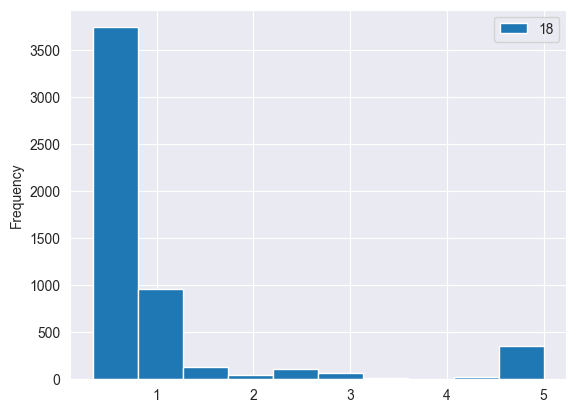

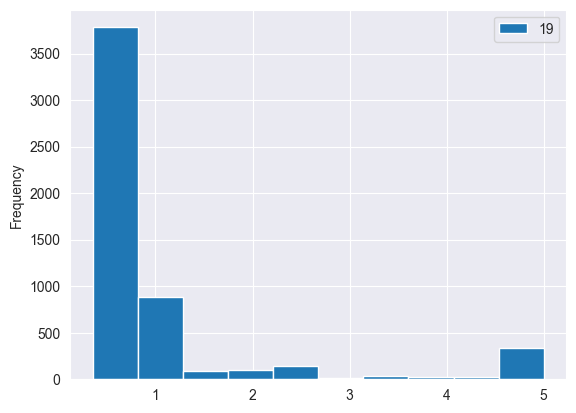

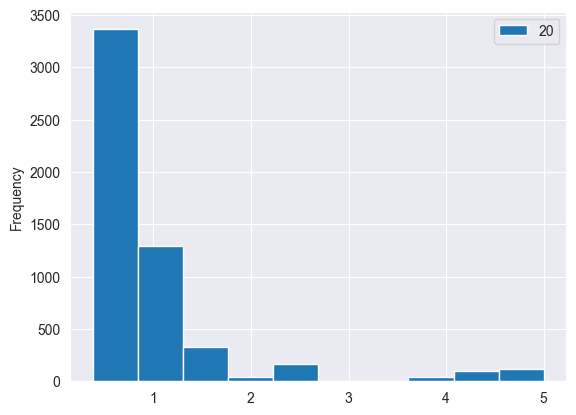

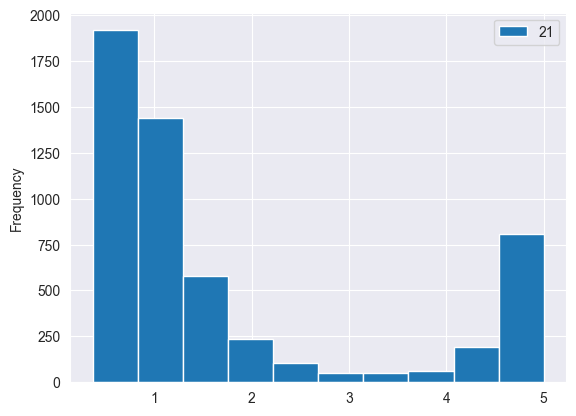

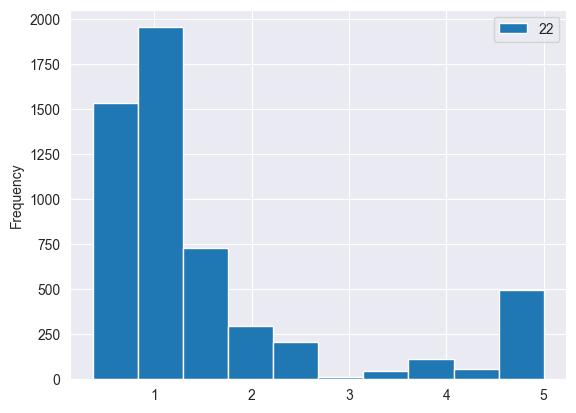

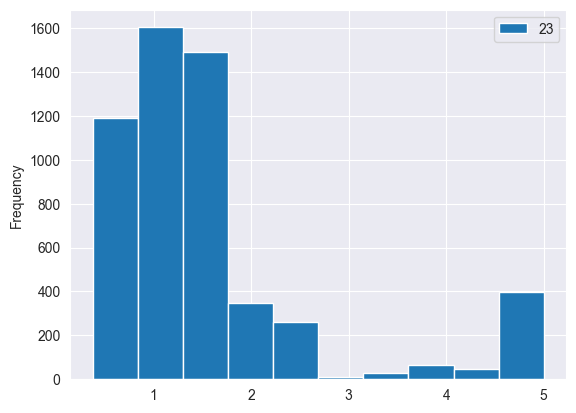

In [403]:
for i in dataset_no_label.columns:
    dataset_no_label[i].plot.hist(legend=True)
    pyplot.show()

# Testando com todos os sensores

O teste inicial vai ser realizado com todos os sensores para depois comparar os sensores laterais da esquerda

In [404]:
X = dataset.drop(["labels"], axis=1)
X.sample(10)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
1554,0.792,1.407,1.390,1.375,1.390,1.601,1.440,2.614,3.244,3.250,...,5.000,0.827,0.837,1.005,5.000,0.569,0.459,0.452,0.460,0.506
442,1.803,5.000,5.000,4.246,5.000,2.225,1.854,5.000,1.763,5.000,...,1.759,0.535,0.496,0.487,0.496,0.514,0.547,1.094,1.095,1.767
552,0.699,0.705,1.460,2.763,3.246,5.000,5.000,1.622,5.000,1.577,...,5.000,0.742,0.739,0.745,0.770,0.799,0.664,0.652,0.643,0.651
5055,2.068,2.821,5.000,5.000,5.000,1.591,1.569,1.548,1.560,1.850,...,0.856,0.876,0.775,0.740,0.720,0.714,0.720,5.000,0.772,1.421
555,0.670,0.695,1.457,2.040,2.778,3.264,5.000,1.626,5.000,1.586,...,5.000,0.738,0.730,0.740,0.763,0.784,0.669,0.653,0.642,0.648
3239,1.616,5.000,5.000,5.000,5.000,5.000,1.867,2.598,2.588,2.594,...,1.814,0.544,0.501,0.492,0.503,0.527,0.540,1.052,1.052,1.716
146,0.862,5.000,1.335,1.347,1.391,1.420,5.000,4.083,5.000,5.000,...,5.000,0.731,0.718,0.727,0.845,1.045,0.755,0.737,0.722,0.734
2873,0.552,0.589,5.000,1.346,1.337,1.346,4.798,4.191,5.000,5.000,...,0.975,0.779,0.769,0.776,0.799,1.006,0.532,0.512,0.502,0.528
1173,1.938,5.000,2.149,5.000,3.058,1.893,5.000,2.906,2.905,5.000,...,1.615,1.573,1.104,1.115,0.854,0.788,0.784,0.814,0.839,0.868
4497,2.661,2.644,2.279,1.867,1.848,1.494,1.296,1.287,1.298,1.568,...,0.793,0.821,0.885,0.861,0.838,0.828,0.837,4.435,3.668,3.730


In [405]:
encoder = LabelEncoder()
labels = encoder.fit_transform(dataset["labels"])
y = pandas.DataFrame(labels)
y.sample(10)

,0
3107,1
1261,0
4203,0
800,2
5297,2
3070,0
1565,1
4213,0
4865,1
2855,1


In [406]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [407]:
minmax_scaler = MinMaxScaler()
X_train = pandas.DataFrame(minmax_scaler.fit_transform(X_train))
X_test = pandas.DataFrame(minmax_scaler.transform(X_test))
X_train.sample(10)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
383,0.056304,0.055834,0.234043,0.161367,0.098196,0.101773,0.171819,0.163705,0.402738,0.408120,...,1.000000,0.071023,0.078470,0.084374,0.160515,0.094080,0.061039,0.059395,0.057630,0.057755
3273,0.170652,0.374264,0.361263,0.208702,0.149485,0.152146,0.219990,0.210851,0.457493,0.415242,...,1.000000,0.036932,0.044747,0.050151,0.057082,0.115178,0.173160,0.171490,0.169868,0.176725
2582,0.212609,0.995202,0.212108,0.413340,0.533247,0.536623,0.997939,0.981047,1.000000,0.026116,...,0.017980,0.029720,0.031128,0.035514,0.041202,0.044564,0.224026,0.240389,0.214979,0.214147
365,0.413696,0.269138,0.247203,0.073153,0.000258,0.010023,0.033230,0.145463,0.156580,0.012346,...,0.132519,0.148601,0.145266,0.479122,0.875966,1.000000,0.480519,1.000000,0.472696,0.472421
3177,0.225000,0.222028,0.222417,0.996175,1.000000,0.854793,0.172334,0.218905,0.230307,0.239316,...,0.190233,0.208916,0.038478,0.036806,0.036695,0.032508,0.030087,0.879266,0.113965,0.227125
1033,0.083913,0.376663,0.374205,0.996175,1.000000,0.267026,0.551520,0.513149,1.000000,0.599953,...,0.119201,0.122159,0.098357,0.092553,0.069099,0.062648,0.059307,0.090497,0.081373,0.330521
2450,0.300435,0.155071,0.298750,0.581640,1.000000,0.998715,0.997939,0.261076,0.227185,0.421415,...,0.298779,0.019886,0.021401,0.021954,0.025107,0.031432,0.024675,0.153348,0.150442,0.152715
3098,0.338696,0.381025,0.395920,0.996175,0.505155,0.304292,0.483514,0.503909,0.798511,0.994777,...,0.122974,0.126967,0.102248,0.102884,0.078755,0.073197,0.070130,1.000000,0.173754,0.272118
2878,0.241957,0.290731,0.287344,0.230935,0.183247,0.185813,0.548944,0.539446,1.000000,0.664292,...,0.158047,0.172421,0.101816,0.052303,0.050215,0.045856,0.042208,0.073650,0.314915,0.242700
15,0.460652,0.559215,0.993639,0.221850,1.000000,0.151375,0.137816,0.177683,0.198127,0.448006,...,0.109878,0.128059,0.141591,0.061989,0.060730,0.055974,0.053896,1.000000,1.000000,0.308025


In [408]:
knn = {}
forest = {}
hgb = {}

In [409]:
def calculate_metrics(y_test, y_pred):
    return {
        "ACC": metrics.accuracy_score(y_test, y_pred),
        "F1": metrics.f1_score(y_test, y_pred, average="weighted"),
        "REC": metrics.recall_score(y_test, y_pred, average="weighted"),
        "PREC": metrics.precision_score(y_test, y_pred, average="weighted"),
    }


def fit_and_predict(model, X_train, X_test, y_train, predict_probability=False):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    probability = None

    if predict_probability: probability = model.predict_proba(X_test)

    return y_pred, probability

In [410]:
def knn_train_and_fit(X_train, X_test, y_train, y_test, k=0):
    if k == 0:
        k = int((len(y_train) + len(y_test)) ** 0.5)

    knn = KNeighborsClassifier(n_neighbors=k)

    y_pred, _ = fit_and_predict(knn, X_train, X_test, y_train)
    training_metrics = calculate_metrics(y_test, y_pred)

    training_metrics["K"] = k

    return training_metrics


def forest_train_and_fit(X_train, X_test, y_train, y_test, estimators, depth, impurity):
    forest = RandomForestClassifier(n_estimators=estimators, max_depth=depth, random_state=42,
                                    verbose=0, class_weight="balanced", min_impurity_decrease=impurity)

    y_pred, _ = fit_and_predict(forest, X_train, X_test, y_train, True)
    training_metrics = calculate_metrics(y_test, y_pred)

    training_metrics["ESTIM"] = estimators
    training_metrics["DEPTH"] = depth
    training_metrics["IMPURITY"] = impurity

    return training_metrics


def hg_boost_train_and_fit(X_train, X_test, y_train, y_test, depth):
    hg = HistGradientBoostingClassifier(max_depth=depth, random_state=77)
    y_pred, _ = fit_and_predict(hg, X_train, X_test, y_train, True)

    training_metrics = calculate_metrics(y_test, y_pred)

    training_metrics["DEPTH"] = depth

    return training_metrics

In [411]:
knn_training = []
for i in range(20):
    knn_training.append(knn_train_and_fit(X_train, X_test, y_train, y_test, i))

/usr/local/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

In [412]:
hgb_training = []
for i in range(1, 20):
    hgb_training.append(hg_boost_train_and_fit(X_train, X_test, y_train, y_test, i))

/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predic

In [413]:
forest_training = []
for i in range(1, 100, 5):
    forest_training.append(forest_train_and_fit(X_train, X_test, y_train, y_test, i, 5, 0.00001))

/var/folders/5x/yzshlnrx1kn6kmfp8bz1pvd80000gn/T/ipykernel_8977/3872759739.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
/var/folders/5x/yzshlnrx1kn6kmfp8bz1pvd80000gn/T/ipykernel_8977/3872759739.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
/var/folders/5x/yzshlnrx1kn6kmfp8bz1pvd80000gn/T/ipykernel_8977/3872759739.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
/var/folders/5x/yzshlnrx1kn6kmfp8bz1pvd80000gn/T/ipykernel_8977/3872759739.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

In [414]:
for i in range(1, 25):
    forest_training.append(forest_train_and_fit(X_train, X_test, y_train, y_test, 41, i, 0.00001))

/var/folders/5x/yzshlnrx1kn6kmfp8bz1pvd80000gn/T/ipykernel_8977/3872759739.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
/var/folders/5x/yzshlnrx1kn6kmfp8bz1pvd80000gn/T/ipykernel_8977/3872759739.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
/var/folders/5x/yzshlnrx1kn6kmfp8bz1pvd80000gn/T/ipykernel_8977/3872759739.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
/var/folders/5x/yzshlnrx1kn6kmfp8bz1pvd80000gn/T/ipykernel_8977/3872759739.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

In [415]:
def get_row_of_max_field(data: list, field: str):
    max_field_value = 0
    selected_row = 0

    for i in range(len(data)):
        if max_field_value == 0:
            max_field_value = data[i][field]
            selected_row = i
            pass

        if data[i][field] > max_field_value:
            max_field_value = data[i][field]
            selected_row = i

    return data[selected_row]

In [416]:
hgb['minmax'] = get_row_of_max_field(hgb_training, 'F1')
forest['minmax'] = get_row_of_max_field(forest_training, 'F1')
knn['minmax'] = get_row_of_max_field(knn_training, 'F1')

In [417]:
all_trained = {
    'knn': knn,
    'forest': forest,
    'hgb': hgb,
}

In [418]:
all_trained

{'knn': {'minmax': {'ACC': 0.7960808328230251,
   'F1': 0.7951581693230815,
   'REC': 0.7960808328230251,
   'PREC': 0.7945899833818575,
   'K': 3}},
 'forest': {'minmax': {'ACC': 0.9038579301898346,
   'F1': 0.9026454211266246,
   'REC': 0.9038579301898346,
   'PREC': 0.9020833180498655,
   'ESTIM': 41,
   'DEPTH': 21,
   'IMPURITY': 1e-05}},
 'hgb': {'minmax': {'ACC': 0.9081445192896509,
   'F1': 0.9071617281995105,
   'REC': 0.9081445192896509,
   'PREC': 0.906623180753459,
   'DEPTH': 10}}}

In [419]:
fOne = []
acc = []
rec = []
prec = []

for i in all_trained:
    fOne.append(all_trained[i]['minmax']['F1'])
    acc.append(all_trained[i]['minmax']['ACC'])
    rec.append(all_trained[i]['minmax']['REC'])
    prec.append(all_trained[i]['minmax']['PREC'])

In [420]:
modelNames = ['K-Nearest Neightbors', 'Random Forest', 'HGBoost']

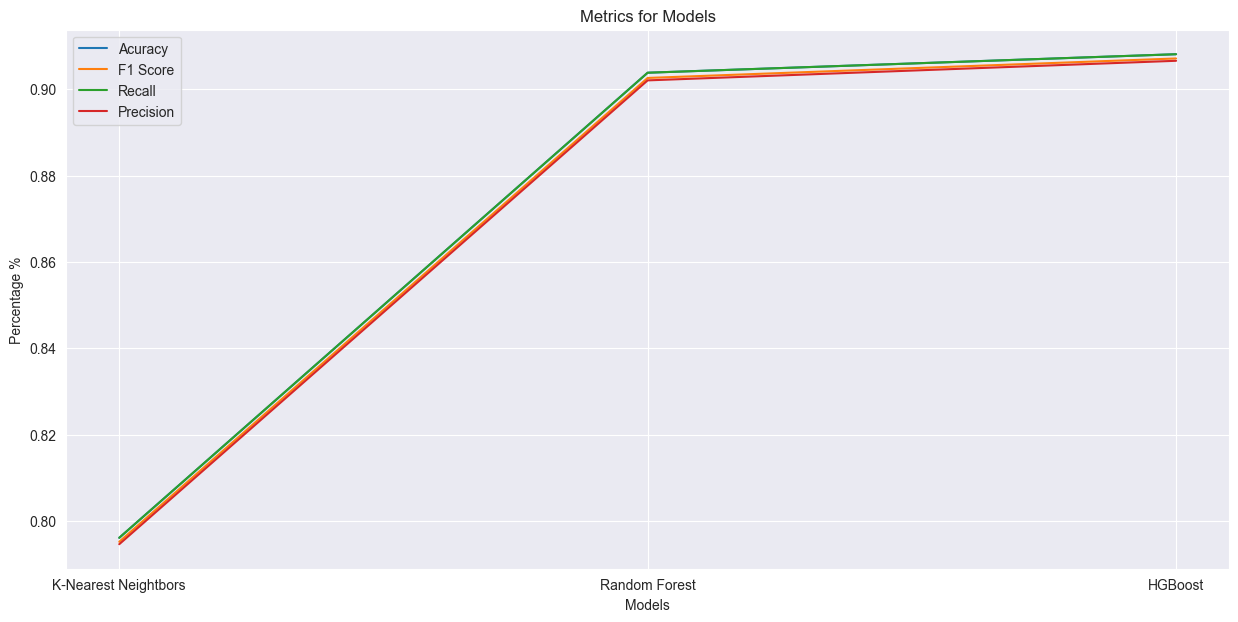

In [421]:
th = list(range(1, 4))
fig, ax = pyplot.subplots(figsize=(15, 7))
ax.plot(modelNames, acc, label='Acuracy')
ax.plot(modelNames, fOne, label='F1 Score')
ax.plot(modelNames, rec, label='Recall')
ax.plot(modelNames, prec, label='Precision')
ax.set_xlabel('Models')
ax.set_ylabel('Percentage %')
ax.set_title("Metrics for Models")
ax.legend();

In [422]:
best_model = all_trained["hgb"]["minmax"]

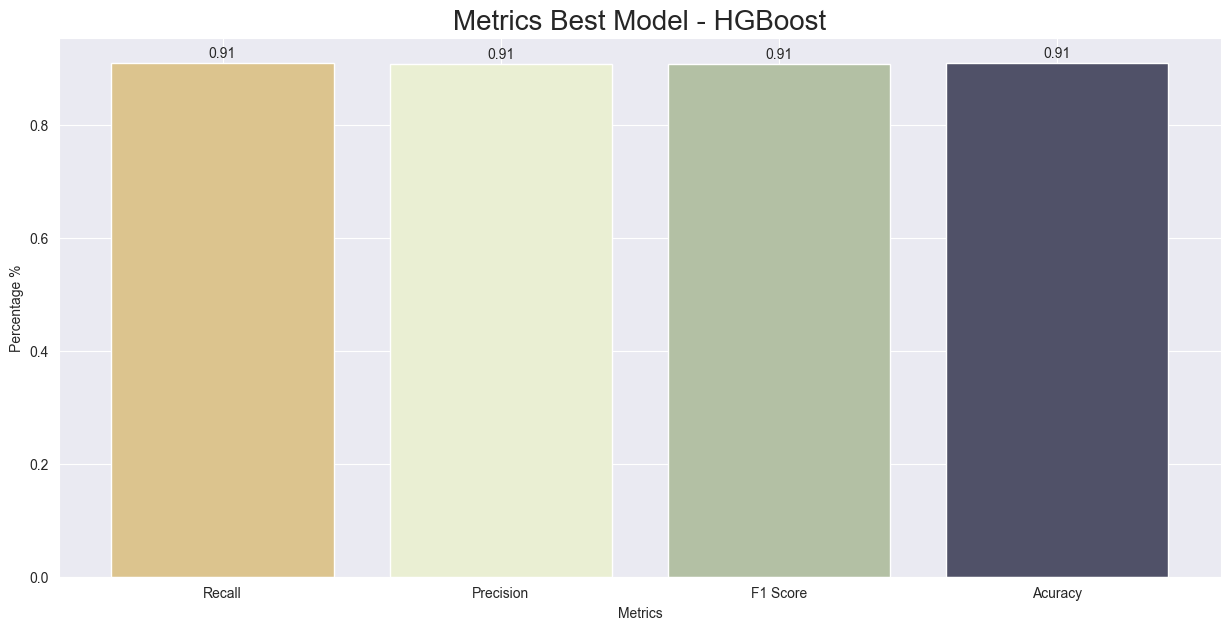

In [423]:
fig, ax = pyplot.subplots(figsize=(15, 7))
values = [best_model['REC'], best_model['PREC'], best_model['F1'], best_model['ACC']]
xlocs = [0.2, 1.2, 2.2, 3.2]
colors = ['#DCC48E', '#EAEFD3', '#B3C0A4', '#505168']
categories = ['Recall', 'Precision', 'F1 Score', 'Acuracy']
ax.bar(categories, values, color=colors);
ax.set_title("Metrics Best Model - HGBoost", fontsize=20)
ax.set_ylabel('Percentage %')
ax.set_xlabel('Metrics')

for i, v in enumerate(values):
    pyplot.text(xlocs[i] - 0.25, v + 0.01, str(round(v, 2)))

# Testando com sensores da esquerda

Um dos testes vai ser realizado só com os sensores da esquerda para validar se temos um melhor performance

In [424]:
# Um dos testes vai ser realizado só com os sensores da esquerda para
# validar se temos um melhor performance

X_left = X[X.columns[0:12]]
X_left.sample(10)

,0,1,2,3,4,5,6,7,8,9,10,11
1399,0.622,2.276,2.512,1.615,5.000,4.497,5.000,1.765,1.761,1.773,5.000,5.000
2369,0.742,0.783,2.024,2.732,5.000,5.000,5.000,1.610,1.581,1.554,1.556,1.580
4008,1.363,1.392,1.412,2.811,2.826,2.818,5.000,2.132,2.950,2.960,5.000,2.315
3361,0.736,0.766,1.495,2.063,2.921,5.000,5.000,1.610,5.000,1.552,1.538,1.552
5087,0.736,0.783,2.035,2.741,2.913,5.000,5.000,5.000,1.608,1.565,1.562,1.827
3401,1.378,1.620,1.433,2.567,3.268,3.203,5.000,5.000,5.000,5.000,0.889,0.882
3251,1.093,1.135,1.806,3.218,4.233,5.000,5.000,2.018,2.588,2.585,1.769,1.744
720,1.122,2.137,2.077,1.717,1.707,1.713,5.000,1.756,2.796,2.806,2.604,2.639
374,1.372,1.362,2.491,2.491,2.678,2.758,2.225,2.149,5.000,2.750,2.731,2.736
1593,0.718,0.745,1.603,1.556,1.547,1.559,1.580,1.601,2.503,3.057,3.019,5.000


In [425]:
X_train, X_test, y_train, y_test = train_test_split(X_left, y, test_size=0.3, random_state=22)

In [426]:
minmax_scaler = MinMaxScaler()
X_train = pandas.DataFrame(minmax_scaler.fit_transform(X_train))
X_test = pandas.DataFrame(minmax_scaler.transform(X_test))
X_train.sample(10)

,0,1,2,3,4,5,6,7,8,9,10,11
131,0.065435,0.431997,0.993639,0.995937,1.000000,0.156772,0.148377,0.194741,0.206532,0.219373,0.303824,0.076267
2840,0.102609,0.101133,0.220004,0.156549,0.089714,0.998715,0.998454,0.757640,1.000000,0.994777,0.310434,0.304832
104,0.080000,0.304708,0.993639,0.995937,0.664862,0.440504,0.998454,0.603648,0.614793,0.850902,0.995515,0.334676
111,0.344783,0.524412,0.471156,0.429254,1.000000,0.552814,0.547656,0.461265,0.470221,0.479107,0.241501,0.729275
1515,0.198696,0.316696,0.305988,0.250000,0.541892,0.536366,0.998454,0.873727,1.000000,0.994777,0.208687,0.210801
2673,0.380217,0.370968,0.389559,0.995937,0.499871,0.303778,0.545337,0.507700,0.803074,0.802707,0.771483,0.163430
1145,0.002609,0.003705,0.209476,0.138623,0.078113,0.117194,0.998454,0.155413,0.597983,0.599003,0.602927,0.753671
1437,0.231304,0.230820,0.229217,0.241396,0.180717,0.180673,0.182638,0.239754,0.415466,0.417854,0.363078,0.349360
2656,0.061957,0.071709,0.341522,0.459847,0.549111,0.998715,0.998454,0.981047,1.000000,0.181387,0.185080,0.190668
3213,0.363478,0.544682,0.544637,0.279637,0.224800,0.230018,0.291087,0.202085,0.295629,0.203704,0.205382,0.208195


In [427]:
knn = {}
forest = {}
hgb = {}

In [ ]:
knn_training = []
for i in range(20):
    knn_training.append(knn_train_and_fit(X_train, X_test, y_train, y_test, i))

hgb_training = []
for i in range(1, 20):
    hgb_training.append(hg_boost_train_and_fit(X_train, X_test, y_train, y_test, i))

forest_training = []
for i in range(1, 100, 5):
    forest_training.append(forest_train_and_fit(X_train, X_test, y_train, y_test, i, 5, 0.00001))

for i in range(1, 25):
    forest_training.append(forest_train_and_fit(X_train, X_test, y_train, y_test, 41, i, 0.00001))

/usr/local/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

In [ ]:
hgb['minmax'] = get_row_of_max_field(hgb_training, 'F1')
forest['minmax'] = get_row_of_max_field(forest_training, 'F1')
knn['minmax'] = get_row_of_max_field(knn_training, 'F1')

all_trained = {
    'knn': knn,
    'forest': forest,
    'hgb': hgb,
}

all_trained

In [ ]:
fOne = []
acc = []
rec = []
prec = []

for i in all_trained:
    fOne.append(all_trained[i]['minmax']['F1'])
    acc.append(all_trained[i]['minmax']['ACC'])
    rec.append(all_trained[i]['minmax']['REC'])
    prec.append(all_trained[i]['minmax']['PREC'])

modelNames = ['K-Nearest Neightbors', 'Random Forest', 'HGBoost']

In [ ]:
th = list(range(1, 4))
fig, ax = pyplot.subplots(figsize=(15, 7))
ax.plot(modelNames, acc, label='Acuracy')
ax.plot(modelNames, fOne, label='F1 Score')
ax.plot(modelNames, rec, label='Recall')
ax.plot(modelNames, prec, label='Precision')
ax.set_xlabel('Models')
ax.set_ylabel('Percentage %')
ax.set_title("Metrics for Models with left sensores")
ax.legend();

In [ ]:
best_model = all_trained["hgb"]["minmax"]
fig, ax = pyplot.subplots(figsize=(15, 7))
values = [best_model['REC'], best_model['PREC'], best_model['F1'], best_model['ACC']]
xlocs = [0.2, 1.2, 2.2, 3.2]
colors = ['#DCC48E', '#EAEFD3', '#B3C0A4', '#505168']
categories = ['Recall', 'Precision', 'F1 Score', 'Acuracy']
ax.bar(categories, values, color=colors);
ax.set_title("Metrics Best Model - HGBoost", fontsize=20)
ax.set_ylabel('Percentage %')
ax.set_xlabel('Metrics')

for i, v in enumerate(values):
    pyplot.text(xlocs[i] - 0.25, v + 0.01, str(round(v, 2)))